# Import Drive and Route to Directory

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images'

/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images


# Import dependence Library

In [ ]:
# import general library
import numpy as np
import pandas as pd
import os

# library for image processing and visualization
from PIL import Image
from matplotlib import pyplot as plt

# library for generator image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# library for create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

In [ ]:
import os
import imageio
import imgaug as ia
from imgaug import augmenters as iaa

# Inisialisasi augmenter
augmenter = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontal 50% dari gambar
    iaa.Crop(percent=(0, 0.1)),  # Crop sebagian dari gambar
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),  # Blur dengan sigma acak antara 0 dan 0.5
    iaa.ContrastNormalization((0.75, 1.5)),  # Normalisasi kontras
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),  # Noise Gaussian
    iaa.Multiply((0.8, 1.2), per_channel=0.2),  # Penggandaan intensitas
    iaa.Affine(rotate=(-25, 25))  # Rotasi antara -25 dan 25 derajat
])

# Path ke folder gambar input dan output
folder_input = "/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images/train/cataract"
folder_output = "/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images/train/cataract"

# Pastikan folder output ada atau buat jika belum ada
if not os.path.exists(folder_output):
    os.makedirs(folder_output)

# Loop melalui semua file gambar dalam folder input
for filename in os.listdir(folder_input):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter hanya file gambar
        input_path = os.path.join(folder_input, filename)
        output_path = os.path.join(folder_output, filename)

        # Baca gambar
        gambar = imageio.imread(input_path)

        # Augmentasi gambar
        gambar_augmented = augmenter.augment_image(gambar)

        # Simpan gambar augmented
        imageio.imwrite(output_path, gambar_augmented)

print("Augmentasi gambar selesai untuk semua gambar dalam folder.")

In [ ]:
# route a path
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}

for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train/cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train/normal" in path:
            image_paths["train_normal"].append(path)
        elif "test/cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test/normal" in path:
            image_paths["test_normal"].append(path)

In [ ]:
# count length
len(image_paths["train_normal"])

246

size of image : (184, 230, 3)


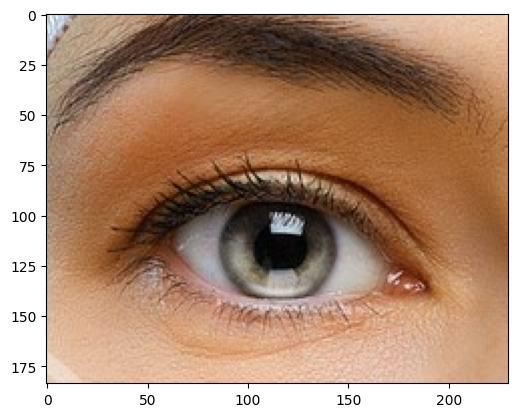

In [ ]:
# sample normal-eye
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (256, 256, 3)


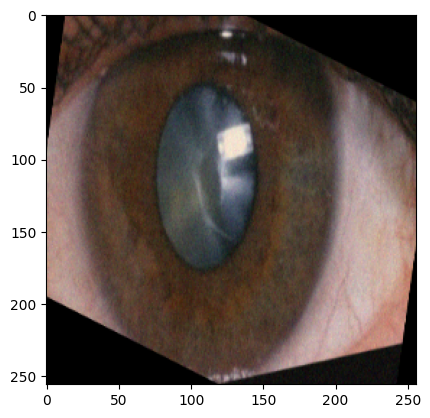

In [ ]:
# sample cataract-eye
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [ ]:
# path to train directory
training_dir = "/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images/train"
image_size = (55, 94, 3)
target_size = (55, 94)

In [ ]:
#  devide data
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 491 images belonging to 2 classes.


In [ ]:
# made a model
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=image_size),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 92, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 46, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 44, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8448)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
# config a model
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)

In [ ]:
# training a model
history = model.fit_generator(
    train_generator,
    epochs=15
)

<ipython-input-13-ea5c78025f10>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
16/16 [==============================] - 86s 5s/step - loss: 0.9525 - accuracy: 0.4888
Epoch 2/15
16/16 [==============================] - 15s 951ms/step - loss: 0.6617 - accuracy: 0.5295
Epoch 3/15
16/16 [==============================] - 15s 938ms/step - loss: 0.5918 - accuracy: 0.7128
Epoch 4/15
16/16 [==============================] - 15s 973ms/step - loss: 0.5103 - accuracy: 0.7515
Epoch 5/15
16/16 [==============================] - 15s 954ms/step - loss: 0.4114 - accuracy: 0.8289
Epoch 6/15
16/16 [==============================] - 15s 892ms/step - loss: 0.4091 - accuracy: 0.8248
Epoch 7/15
16/16 [==============================] - 15s 975ms/step - loss: 0.3470 - accuracy: 0.8635
Epoch 8/15
16/16 [==============================] - 15s 950ms/step - loss: 0.3558 - accuracy: 0.8371
Epoch 9/15
16/16 [==============================] - 15s 979ms/step - loss: 0.3211 - accuracy: 0.8656
Epoch 10/15
16/16 [==============================] - 15s 871ms/step - loss: 0.3265 - accuracy:

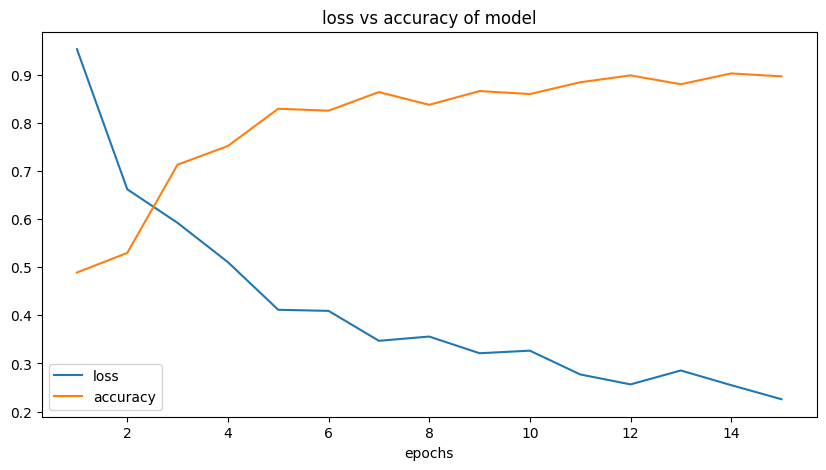

In [ ]:
48# visualization accuracy
epochs = range(1, 16)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [ ]:
# import library tft
import tensorflow as tf

In [ ]:
# import library kera.preprocessing.image
from keras.preprocessing import image

In [ ]:
label = train_generator.class_indices
print(label)

{'cataract': 0, 'normal': 1}


1/1 [==============================] - 0s 134ms/step
actual class : cataract
predicted class : cataract


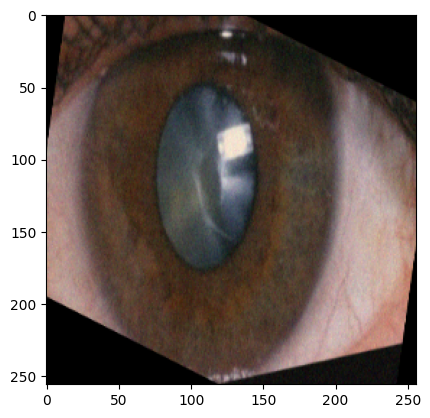

In [ ]:
# evaluation
path = image_paths["test_cataract"][0]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

1/1 [==============================] - 0s 20ms/step
actual class : normal
predicted class : normal


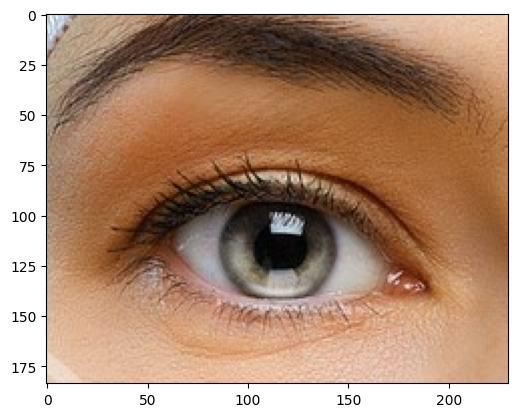

In [ ]:
# evaluation
path = image_paths["test_normal"][1]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

In [ ]:
# predict function
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [ ]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)

        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)

    return normal_pred, cataract_pred

In [ ]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

1/1 [==============================] - 0s 27ms/step


In [ ]:
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

In [ ]:
pred_df.tail(20)

,relative_path,actual_class,predicted_class
100,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
101,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
102,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
103,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
104,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
105,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
106,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
107,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
108,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract
109,/content/gdrive/MyDrive/Semester 5/Capstone Pr...,cataract,cataract


In [ ]:
tp = tn = fp = fn = 0
for actual, predicted in zip(list(pred_df['actual_class']), list(pred_df['predicted_class'])):
    if actual == 'normal' and predicted == 'normal':
        tp = tp + 1
    elif actual == 'cataract' and predicted == 'cataract':
        tn = tn + 1
    elif actual == 'normal' and predicted == 'cataract':
        fp = fp + 1
    elif actual == 'cataract' and predicted == 'normal':
        fn = fn + 1

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

In [ ]:
evaluation_summary = pd.DataFrame()
evaluation_summary["accuracy"] = [accuracy]
evaluation_summary["precision"] = [precision]
evaluation_summary["recall"] = [recall]
evaluation_summary["f1"] = [f1]

In [ ]:
evaluation_summary

,accuracy,precision,recall,f1
0,0.858333,0.766667,0.938776,0.844037


In [ ]:
model.save("/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images/Eye Detection Model/modelcoba.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/gdrive/MyDrive/Semester 5/Capstone Project/Dataset/ReallyDataset/processed_images/Eye Detection Model/modelcoba.tflite', 'wb') as f:
  f.write(tflite_model)